In this notebook I extract an important mapping between id, year and isin from cdp_summary. This mapping is used in the notebook "cdp_data_preparation.ipynb" to create the final dataset.

Furthermore - I extract and work on relevant predictors from cdp_summary.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# reading the data
cdp_summary = pd.read_stata("../../data/CDP Cleaning/cleaned outputs/cdp_summary.dta").replace("", pd.NA)

In [3]:
cdp_summary.shape

(34588, 10)

In [4]:
isin_mapping = cdp_summary[["id", "year", "isin"]].replace('NA', np.nan).dropna(subset='isin')

In [5]:
(isin_mapping['isin'] == 'NA').mean()

0.0

In [6]:
# creating the mapping and storing it as a csv file
isin_mapping.to_csv("../../data/processed/id_year_isin_mapping.csv", index=False)

Saving the Mapping:

In [7]:
# try to read the mapping
new = pd.read_csv("../../data/processed/id_year_isin_mapping.csv")
new.head()

,id,year,isin
0,44,2011.0,GB00B1YW4409
1,44,2012.0,GB00B1YW4409
2,44,2013.0,GB00B1YW4409
3,44,2014.0,GB00B1YW4409
4,44,2016.0,GB00B1YW4409


In [8]:
new.shape

(24302, 3)

In [9]:
isin_mapping.iloc[new.loc[new['isin'].isna()].index, :]

,id,year,isin


In [10]:
# now selecting relevant predictors from the cdp_summary dataset
cdp_summary.shape

(34588, 10)

Exploratory Data Analysis on cdp_summary:

Isin:
- number of unique isins:  4628
- percentage of unique companies without an isin: 61%
- unique isins per year (plus histogram): see graph below

In [11]:
# number of unique isins
len(cdp_summary['isin'].unique()) - 1

4628

In [12]:
# percentage of companies without isings grouping by id
cdp_summary.groupby('id')['isin'].first().isna().mean() * 100

61.077154752413854

In [13]:
cdp_summary.groupby('year')['isin'].nunique()

year
2010.0     915
2011.0    1223
2012.0    1462
2013.0    1716
2014.0    1746
2015.0    1798
2016.0    1846
2017.0    1888
2018.0    1696
2019.0    1915
2020.0    2119
2021.0    2715
2022.0    3266
Name: isin, dtype: int64

In [14]:
cdp_summary.groupby('year')['isin'].nunique()

year
2010.0     915
2011.0    1223
2012.0    1462
2013.0    1716
2014.0    1746
2015.0    1798
2016.0    1846
2017.0    1888
2018.0    1696
2019.0    1915
2020.0    2119
2021.0    2715
2022.0    3266
Name: isin, dtype: int64

In [21]:
cdp_summary['industry14'].value_counts()

industry14
Manufacturing                    9539
Services                         7954
Materials                        2277
Infrastructure                   2010
Food, beverage & agriculture     1571
Retail                           1516
Transportation services          1275
Biotech, health care & pharma    1138
Fossil Fuels                      804
Power generation                  723
Apparel                           573
Hospitality                       343
Mineral extraction                287
Corporate Tags                      5
International bodies                5
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of unique ISINs per year')

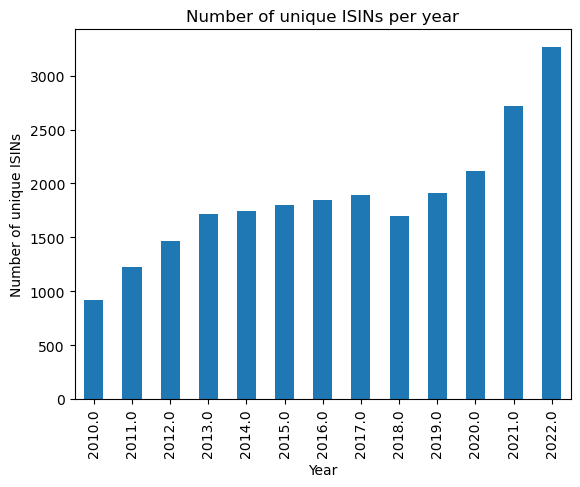

In [46]:
plt = cdp_summary.groupby('year')['isin'].nunique().plot(kind='bar')
plt.set_xlabel("Year")
plt.set_ylabel("Number of unique ISINs")
plt.set_title("Number of unique ISINs per year")

Predictors:

- reporting boundary
- country
- industry14
- industry46

In [47]:
cdp_summary.head()

,id,reporting_boundary,year,companyname,country,industry14,isin,ticker,industry46,cdpdate
0,44,<NA>,2011.0,3i Group,United Kingdom,Services,GB00B1YW4409,III LN,banks diverse financials insurance,NaT
1,44,<NA>,2012.0,3i Group,United Kingdom,Services,GB00B1YW4409,III LN,banks diverse financials insurance,NaT
2,44,<NA>,2013.0,3i Group,United Kingdom,Services,GB00B1YW4409,III LN,banks diverse financials insurance,2013-06-18
3,44,<NA>,2014.0,3i Group,United Kingdom,Services,GB00B1YW4409,III LN,banks diverse financials insurance,2014-06-26
4,44,<NA>,2016.0,3i Group,United Kingdom,Services,GB00B1YW4409,III LN,banks diverse financials insurance,2016-06-27


In [48]:
# replace na values in reporting boundary with "not reported"
cdp_summary['reporting_boundary'] = cdp_summary['reporting_boundary'].fillna("not reported")

In [49]:
# reporting boundary EDA all
cdp_summary.groupby('year')['reporting_boundary'].value_counts(normalize=True).unstack()

reporting_boundary,equity share,financial control,not reported,operational control,other
year,,,,,
2010.0,NaN,NaN,1.000000,NaN,NaN
2011.0,NaN,NaN,1.000000,NaN,NaN
2012.0,NaN,NaN,1.000000,NaN,NaN
2013.0,NaN,NaN,1.000000,NaN,NaN
2014.0,NaN,NaN,1.000000,NaN,NaN
2015.0,NaN,NaN,1.000000,NaN,NaN
2016.0,NaN,NaN,1.000000,NaN,NaN
2017.0,NaN,NaN,1.000000,NaN,NaN
2018.0,0.028271,0.267184,0.022173,0.666297,0.016075


In [19]:
# cdp summary reporting boundary EDA only with isins
cdp_summary[cdp_summary['isin'].notna()].groupby('year')['reporting_boundary'].value_counts(normalize=True).unstack()

reporting_boundary,equity share,financial control,not reported,operational control,other
year,,,,,
2010.0,NaN,NaN,1.000000,NaN,NaN
2011.0,NaN,NaN,1.000000,NaN,NaN
2012.0,NaN,NaN,1.000000,NaN,NaN
2013.0,NaN,NaN,1.000000,NaN,NaN
2014.0,NaN,NaN,1.000000,NaN,NaN
2015.0,NaN,NaN,1.000000,NaN,NaN
2016.0,NaN,NaN,1.000000,NaN,NaN
2017.0,NaN,NaN,1.000000,NaN,NaN
2018.0,0.028749,0.268320,0.019729,0.666855,0.016347


Country Eda:

In [50]:
# companies with isins number of companies per country histogram
cdp_summary[cdp_summary['isin'].notna()].groupby('country')['id'].nunique().sort_values(ascending=False).head()

country
USA               843
Japan             769
United Kingdom    423
Canada            178
South Korea       167
Name: id, dtype: int64

I will group countries with less than 5 companies into others. This is done to reduce the number of dummy variables.

In [21]:
cdp_summary.head()

,id,reporting_boundary,year,companyname,country,industry14,isin,ticker,industry46,cdpdate
0,44,not reported,2011.0,3i Group,United Kingdom,Services,GB00B1YW4409,III LN,banks diverse financials insurance,NaT
1,44,not reported,2012.0,3i Group,United Kingdom,Services,GB00B1YW4409,III LN,banks diverse financials insurance,NaT
2,44,not reported,2013.0,3i Group,United Kingdom,Services,GB00B1YW4409,III LN,banks diverse financials insurance,2013-06-18
3,44,not reported,2014.0,3i Group,United Kingdom,Services,GB00B1YW4409,III LN,banks diverse financials insurance,2014-06-26
4,44,not reported,2016.0,3i Group,United Kingdom,Services,GB00B1YW4409,III LN,banks diverse financials insurance,2016-06-27


# Industry 14 and 46 Eda:

In [22]:
# cdp summary reporting boundary EDA only with isins
cdp_summary[cdp_summary['isin'].notna()].groupby('year')['industry14'].value_counts(normalize=True).unstack()

industry14,Apparel,"Biotech, health care & pharma",Corporate Tags,"Food, beverage & agriculture",Fossil Fuels,Hospitality,Infrastructure,Manufacturing,Materials,Mineral extraction,Power generation,Retail,Services,Transportation services
year,,,,,,,,,,,,,,
2010.0,0.009132,0.045662,NaN,0.051750,0.036530,0.009132,0.082192,0.264840,0.050228,0.015221,0.041096,0.042618,0.315068,0.036530
2011.0,0.005688,0.052332,NaN,0.043231,0.038680,0.010239,0.087600,0.266212,0.051195,0.025028,0.036405,0.047782,0.300341,0.035267
2012.0,0.007805,0.047805,NaN,0.044878,0.035122,0.010732,0.085854,0.256585,0.052683,0.026341,0.038049,0.042927,0.310244,0.040976
2013.0,0.009557,0.048653,NaN,0.046916,0.033884,0.012163,0.083406,0.257168,0.054735,0.025195,0.031277,0.046916,0.309296,0.040834
2014.0,0.010433,0.044141,NaN,0.048154,0.034510,0.015249,0.084270,0.259230,0.052970,0.022472,0.032905,0.043339,0.313804,0.038523
2015.0,0.009496,0.047480,NaN,0.048210,0.032871,0.015340,0.084733,0.255661,0.056245,0.024105,0.029949,0.042367,0.316289,0.037253
2016.0,0.011068,0.049479,NaN,0.051432,0.033203,0.014974,0.079427,0.263672,0.052734,0.022135,0.027995,0.044922,0.311198,0.037760
2017.0,0.010804,0.051621,NaN,0.052221,0.034814,0.014406,0.081633,0.261705,0.054022,0.022809,0.028812,0.046819,0.305522,0.034814
2018.0,0.009583,0.049605,NaN,0.052424,0.035513,0.016911,0.084555,0.258174,0.049042,0.020293,0.032694,0.045096,0.307779,0.038331


In [23]:
# cdp summary reporting boundary EDA only with isins
cdp_summary[cdp_summary['isin'].notna()].groupby('year')['industry46'].value_counts(normalize=True).unstack()

industry46,aerospace defense,air freight transportation logistics,air transportation - airlines,air transportation - airport services,automobiles components,banks diverse financials insurance,building products,chemicals,construction engineering,construction materials,...,software services,specialized consumer services,technology hardware equipment,telecommunication services,textiles apparel footwear luxury goods,tires,tobacco,trading companies distributors commercial services supplies,water transportation,water utilities
year,,,,,,,,,,,,,,,,,,,,,
2010.0,0.018203,0.028441,0.009101,0.005688,0.018203,0.150171,0.009101,0.044369,0.032992,NaN,...,0.030717,0.001138,0.059158,0.032992,0.007964,NaN,0.006826,0.021615,0.001138,0.003413
2011.0,0.014358,0.026182,0.009291,0.004223,0.020270,0.149493,0.010135,0.047297,0.038851,NaN,...,0.024493,0.001689,0.055743,0.032095,0.006757,NaN,0.005068,0.023649,0.002534,0.002534
2012.0,0.014634,0.027875,0.010453,0.003484,0.018118,0.150523,0.011150,0.040418,0.037631,NaN,...,0.029268,0.002091,0.054355,0.032753,0.006969,NaN,0.005575,0.031359,0.000697,0.003484
2013.0,0.013087,0.027960,0.010113,0.003569,0.019036,0.149911,0.009518,0.042832,0.032719,NaN,...,0.028554,0.002380,0.057109,0.032124,0.008328,NaN,0.004759,0.025580,0.001190,0.004164
2014.0,0.013395,0.027956,0.008736,0.002912,0.022132,0.152592,0.009901,0.041351,0.034362,NaN,...,0.032033,0.001747,0.049505,0.031450,0.007571,NaN,0.005242,0.027373,0.001165,0.003494
2015.0,0.013194,0.009896,0.007697,0.002749,0.021440,0.145135,0.010995,0.039582,0.031336,0.012095,...,0.030786,0.002199,0.050027,0.030236,0.008246,0.004948,0.004398,0.031886,0.005498,0.003848
2016.0,0.012215,0.010090,0.007966,0.004249,0.024960,0.137015,0.010621,0.044610,0.027084,0.011152,...,0.033988,0.000531,0.051514,0.030271,0.010090,0.003717,0.004780,0.033988,0.004780,0.003717
2017.0,0.013478,0.009850,0.007776,0.004147,0.026439,0.135822,0.009850,0.048212,0.025402,0.010886,...,0.033178,0.000518,0.045619,0.029031,0.010886,0.005184,0.004147,0.034733,0.004666,0.003629
2018.0,0.012916,0.010197,0.008158,0.004079,0.025833,0.137322,0.010197,0.046907,0.025153,0.008838,...,0.031271,0.001360,0.045547,0.027872,0.010197,0.004759,0.002719,0.037390,0.004759,0.004079


In [24]:
(cdp_summary[cdp_summary['isin'].notna()]['industry14'].isna()).mean()

0.13101255503016468

In [25]:
(cdp_summary[cdp_summary['isin'].notna()]['industry46'].isna()).mean()

0.2093184412196315

In [26]:
# per year number of nan values in industry14
cdp_summary[cdp_summary['isin'].notna()].groupby('year')['industry14'].apply(lambda x: x.isna().sum())

year
2010.0    260
2011.0    351
2012.0    453
2013.0    574
2014.0    516
2015.0    450
2016.0    347
2017.0    263
2018.0      0
2019.0      0
2020.0      0
2021.0      0
2022.0      0
Name: industry14, dtype: int64

In [27]:
# per year number of nan values in industry46
cdp_summary[cdp_summary['isin'].notna()].groupby('year')['industry46'].apply(lambda x: x.isna().sum())

year
2010.0      38
2011.0      46
2012.0      43
2013.0      44
2014.0      45
2015.0       0
2016.0       0
2017.0       0
2018.0     303
2019.0     488
2020.0     769
2021.0    1376
2022.0    1983
Name: industry46, dtype: int64

In [28]:
# number of companies per year with isin
cdp_summary[cdp_summary['isin'].notna()].groupby('year')['id'].nunique()

year
2010.0     917
2011.0    1230
2012.0    1478
2013.0    1725
2014.0    1762
2015.0    1819
2016.0    1883
2017.0    1929
2018.0    1774
2019.0    1915
2020.0    2119
2021.0    2715
2022.0    3266
Name: id, dtype: int64

Observations: while industry14 is always present after 2018, industry46 is often not present after 2018, 

Action: I will include both predictors and make sure that the model can handle missing values by creatign an other category for industry 46.

# Analyzing cdp date

In [29]:
cdp_summary.head()

,id,reporting_boundary,year,companyname,country,industry14,isin,ticker,industry46,cdpdate
0,44,not reported,2011.0,3i Group,United Kingdom,Services,GB00B1YW4409,III LN,banks diverse financials insurance,NaT
1,44,not reported,2012.0,3i Group,United Kingdom,Services,GB00B1YW4409,III LN,banks diverse financials insurance,NaT
2,44,not reported,2013.0,3i Group,United Kingdom,Services,GB00B1YW4409,III LN,banks diverse financials insurance,2013-06-18
3,44,not reported,2014.0,3i Group,United Kingdom,Services,GB00B1YW4409,III LN,banks diverse financials insurance,2014-06-26
4,44,not reported,2016.0,3i Group,United Kingdom,Services,GB00B1YW4409,III LN,banks diverse financials insurance,2016-06-27


In [30]:
# convert cdpdate to month of the year
cdp_summary['cdpdate'] = pd.to_datetime(cdp_summary['cdpdate']).dt.month

Text(0.5, 1.0, 'Histogram of cdpdate')

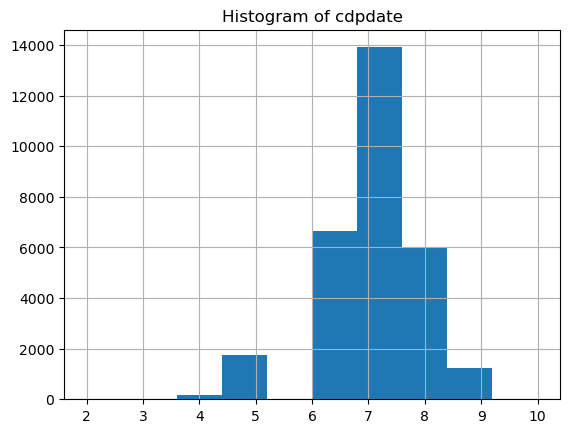

In [31]:
# plot histogram of cdpdate
cdp_summary['cdpdate'].hist().set_title("Histogram of cdpdate")

In [54]:
# Count unique ISINs for each country
isin_counts = cdp_summary.groupby('country')['isin'].nunique()

# Find countries with less than 5 unique ISINs
countries_to_rename = isin_counts[isin_counts < 4].index

# Replace countries with fewer than 4 unique ISINs with 'other'
cdp_summary['country'] = cdp_summary['country'].replace(countries_to_rename, 'other').replace(pd.NA, 'other')

# replace industry46 nans with "not reported"
cdp_summary['industry46'] = cdp_summary['industry46'].fillna("not reported")
cdp_summary['industry14'] = cdp_summary['industry14'].fillna("not reported")

In [52]:
# count na values by column
cdp_summary.isna().sum()

id                        0
reporting_boundary        0
year                      0
companyname               0
country                   0
industry14             4568
isin                  10056
ticker                 8934
industry46                0
cdpdate                4767
dtype: int64

Question: should I treat CDP month as a categorical or as a numerical variable? I believe categorical might be better, since the month of the year might have an impact on the response variable.

In [55]:
cdp_summary[['id', 'year', 'reporting_boundary', 'country', 'industry14', 'industry46', 'cdpdate']]

,id,year,reporting_boundary,country,industry14,industry46,cdpdate
0,44,2011.0,not reported,United Kingdom,Services,banks diverse financials insurance,NaT
1,44,2012.0,not reported,United Kingdom,Services,banks diverse financials insurance,NaT
2,44,2013.0,not reported,United Kingdom,Services,banks diverse financials insurance,2013-06-18
3,44,2014.0,not reported,United Kingdom,Services,banks diverse financials insurance,2014-06-26
4,44,2016.0,not reported,United Kingdom,Services,banks diverse financials insurance,2016-06-27
...,...,...,...,...,...,...,...
34583,895873,2022.0,operational control,USA,Manufacturing,not reported,2022-09-28
34584,895909,2022.0,not reported,Mexico,Manufacturing,not reported,2022-09-21
34585,896044,2022.0,financial control,Japan,Infrastructure,not reported,2022-09-29
34586,896120,2022.0,operational control,South Korea,Manufacturing,not reported,2022-09-28


In [67]:
cdp_summary_selected = cdp_summary[['id', 'year', 'reporting_boundary', 'industry14']]

In [68]:
# one hot encoding of categorical variables
cdp_summary_selected = pd.get_dummies(cdp_summary_selected, columns=['reporting_boundary', 'industry14'], drop_first=True, dtype=int)

In [69]:
cdp_summary_selected.head()

,id,year,reporting_boundary_financial control,reporting_boundary_not reported,reporting_boundary_operational control,reporting_boundary_other,"industry14_Biotech, health care & pharma",industry14_Corporate Tags,"industry14_Food, beverage & agriculture",industry14_Fossil Fuels,...,industry14_Infrastructure,industry14_International bodies,industry14_Manufacturing,industry14_Materials,industry14_Mineral extraction,industry14_Power generation,industry14_Retail,industry14_Services,industry14_Transportation services,industry14_not reported
0,44,2011.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,44,2012.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,2013.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,2014.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,44,2016.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
cdp_summary_selected.shape

(34588, 21)

In [71]:
# save the data
cdp_summary_selected.to_csv("../../data/processed/cdp_summary_selected_processed.csv", index=False)

In [72]:
cdp_summary_selected

,id,year,reporting_boundary_financial control,reporting_boundary_not reported,reporting_boundary_operational control,reporting_boundary_other,"industry14_Biotech, health care & pharma",industry14_Corporate Tags,"industry14_Food, beverage & agriculture",industry14_Fossil Fuels,...,industry14_Infrastructure,industry14_International bodies,industry14_Manufacturing,industry14_Materials,industry14_Mineral extraction,industry14_Power generation,industry14_Retail,industry14_Services,industry14_Transportation services,industry14_not reported
0,44,2011.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,44,2012.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,2013.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,2014.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,44,2016.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34583,895873,2022.0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
34584,895909,2022.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
34585,896044,2022.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
34586,896120,2022.0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [152]:
# read the data and check
pd.read_csv("../../data/processed/cdp_summary_selected.csv").head()

,id,year,isin,reporting_boundary,country,industry14,industry46,cdpdate
0,44,2018.0,GB00B1YW4409,operational control,United Kingdom,Services,banks diverse financials insurance,8.0
1,44,2019.0,GB00B1YW4409,operational control,United Kingdom,Services,banks diverse financials insurance,7.0
2,44,2020.0,GB00B1YW4409,operational control,United Kingdom,Services,banks diverse financials insurance,8.0
3,44,2021.0,GB00B1YW4409,operational control,United Kingdom,Services,banks diverse financials insurance,7.0
4,44,2022.0,GB00B1YW4409,operational control,United Kingdom,Services,banks diverse financials insurance,7.0


In [153]:
cdp_summary_selected.industry14.unique()

array(['Services', 'Infrastructure', 'Biotech, health care & pharma',
       'Power generation', 'Materials', 'Manufacturing', 'Hospitality',
       'Transportation services', 'Retail', 'Mineral extraction',
       'Food, beverage & agriculture', 'Fossil Fuels', 'Apparel',
       'Corporate Tags'], dtype=object)

TODO: eda on the cdp_summary dataset and select relevant columns to add in the df of predictors

TODO: source financial data to add in the df of predictors and link it with the id and isin